# Toronto Dwellings Analysis

In this assignment, you will perform fundamental analysis for the Toronto dwellings market to allow potential real estate investors to choose rental investment properties.

In [48]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv
from holoviews import opts

In [2]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox_api_key")

## Load Data

In [3]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")
to_data.head()

neighbourhood  single_detached_house  \
year                                                        
2001               Agincourt North                   3715   
2001  Agincourt South-Malvern West                   3250   
2001                     Alderwood                   3175   
2001                         Annex                   1060   
2001             Banbury-Don Mills                   3615   

      apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
year                                                                       
2001                         1480                 0                 1055   
2001                         1835                 0                  545   
2001                          315                 0                  470   
2001                         6090                 5                 1980   
2001                         4465                 0                  240   

      row_house  duplex  apartment_five_storeys_less  other_house  \
year                                                                
2001       1295     195                          185            5   
2001        455     105                          425            0   
2001         50     185                          370            0   
2001        605     275                         3710          165   
2001        380      15                         1360            0   

      average_house_value  shelter_costs_owned  shelter_costs_rented  
year                                                                  
2001               200388                  810                   870  
2001               203047                  806                   892  
2001               259998                  817                   924  
2001               453850                 1027                  1378  
2001               371864                 1007                  1163

- - - 

## Dwelling Types Per Year

In this section, you will calculate the number of dwelling types per year. Visualize the results using bar charts and the Pandas plot function. 

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Plot each bar chart in a different color.

In [4]:
# Calculate the sum number of dwelling types units per year (hint: use groupby)
# YOUR CODE HERE!

sum_dwelling = to_data.groupby(by=['year']).sum()
sum_dwelling.head()

single_detached_house  apartment_five_storeys_plus  movable_dwelling  \
year                                                                         
2001                 300930                       355015                75   
2006                 266860                       379400               165   
2011                 274940                       429220               100   
2016                 269680                       493270                95   

      semi_detached_house  row_house  duplex  apartment_five_storeys_less  \
year                                                                        
2001                90995      52355   23785                       116900   
2006                69430      54690   44095                       162850   
2011                72480      60355   44750                       163895   
2016                71200      61565   48585                       165575   

      other_house  average_house_value  shelter_costs_owned  \
year                                                          
2001         3040             40583604               118563   
2006         1335             59368353               184352   
2011         2165             74259461               202750   
2016         2845             92969566               246584   

      shelter_costs_rented  
year                        
2001                152031  
2006                129558  
2011                142771  
2016                175885

In [5]:
# Save the dataframe as a csv file
# YOUR CODE HERE!

sum_dwelling.to_csv('sum_dwelling.csv')

In [6]:
## Sliced Data for Shelter Costs of Owned Properties
year = ['2001', '2006', '2011', '2016']
shelter_costs_owned = [118563, 184352, 202750, 246584]

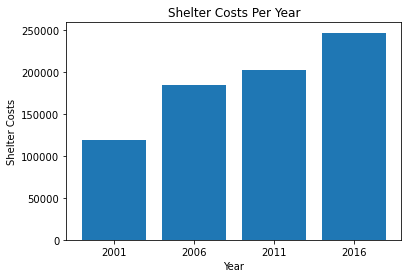

In [7]:
## SHELTER COST GRAPTH
plt.bar(year, shelter_costs_owned)
plt.title('Shelter Costs Per Year')
plt.xlabel('Year')
plt.ylabel('Shelter Costs')
plt.show()                     

In [8]:
# Create a bar chart per year to show the number of dwelling types
""" New Data Frame to plot individual year data """

data_types = sum_dwelling[
    ['single_detached_house', 'apartment_five_storeys_plus','movable_dwelling','semi_detached_house','row_house',
    'duplex', 'apartment_five_storeys_less', 'other_house']
]
data_types.head()


single_detached_house  apartment_five_storeys_plus  movable_dwelling  \
year                                                                         
2001                 300930                       355015                75   
2006                 266860                       379400               165   
2011                 274940                       429220               100   
2016                 269680                       493270                95   

      semi_detached_house  row_house  duplex  apartment_five_storeys_less  \
year                                                                        
2001                90995      52355   23785                       116900   
2006                69430      54690   44095                       162850   
2011                72480      60355   44750                       163895   
2016                71200      61565   48585                       165575   

      other_house  
year               
2001         3040  
2006         1335  
2011         2165  
2016         2845

<AxesSubplot:title={'center':'Year 2001 Dwelling Types'}>

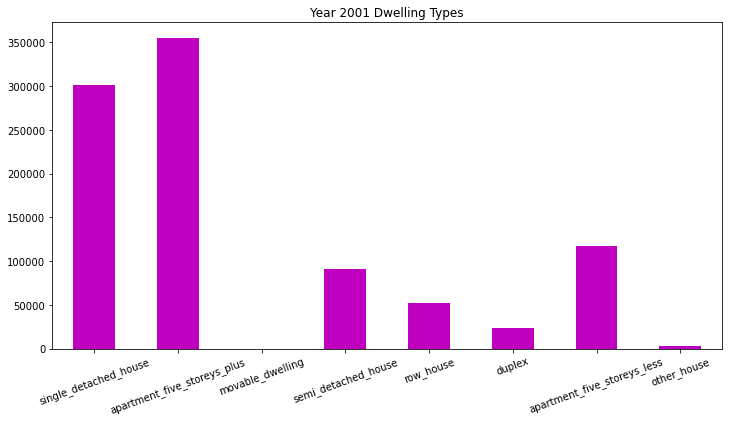

In [9]:
# Bar chart for 2001
# YOUR CODE HERE!

row = data_types.iloc[0]
row.plot(kind='bar',title='Year 2001 Dwelling Types',figsize=(12,6), color='m',rot=20)

<AxesSubplot:title={'center':'Year 2001 Dwelling Types'}>

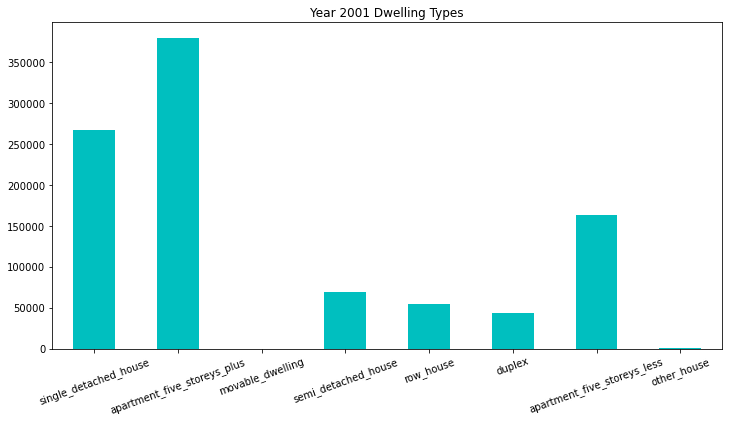

In [10]:
# Bar chart for 2006
# YOUR CODE HERE!

row2 = data_types.iloc[1]
row2.plot(kind='bar',title='Year 2001 Dwelling Types',figsize=(12,6), color='c',rot=20)

<AxesSubplot:title={'center':'Year 2001 Dwelling Types'}>

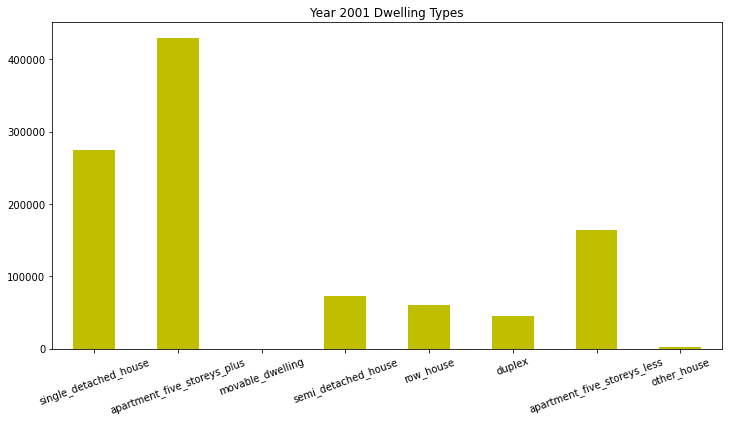

In [11]:
# Bar chart for 2011
# YOUR CODE HERE!

row3 = data_types.iloc[2]
row3.plot(kind='bar',title='Year 2001 Dwelling Types',figsize=(12,6), color='y',rot=20)

<AxesSubplot:title={'center':'Year 2001 Dwelling Types'}>

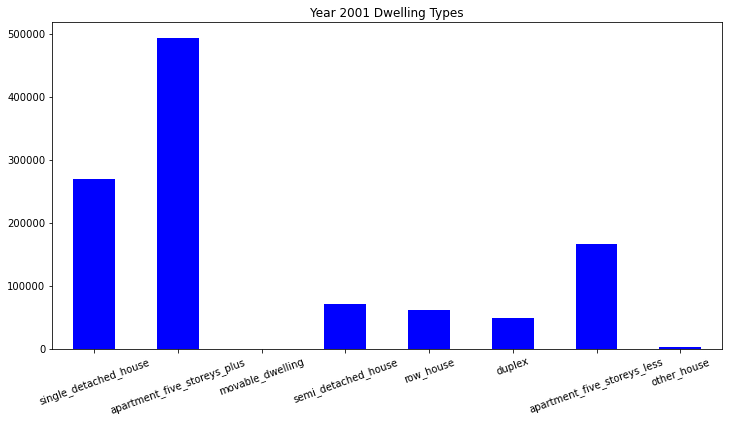

In [12]:
# Bar chart for 2016
# YOUR CODE HERE!

row4 = data_types.iloc[3]
row4.plot(kind='bar',title='Year 2001 Dwelling Types',figsize=(12,6), color='blue', rot=20)

- - - 

## Average Monthly Shelter Costs in Toronto Per Year

In this section, you will calculate the average monthly shelter costs for owned and rented dwellings and the average house value for each year. Plot the results as a line chart.

**Optional challenge:** Plot each line chart in a different color.

In [42]:
to_data

neighbourhood  single_detached_house  \
year                                                        
2001               Agincourt North                   3715   
2001  Agincourt South-Malvern West                   3250   
2001                     Alderwood                   3175   
2001                         Annex                   1060   
2001             Banbury-Don Mills                   3615   
...                            ...                    ...   
2016                      Wychwood                    920   
2016                Yonge-Eglinton                   1400   
2016                Yonge-St.Clair                    520   
2016       York University Heights                   1235   
2016            Yorkdale-Glen Park                   2165   

      apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
year                                                                       
2001                         1480                 0                 1055   
2001                         1835                 0                  545   
2001                          315                 0                  470   
2001                         6090                 5                 1980   
2001                         4465                 0                  240   
...                           ...               ...                  ...   
2016                         1295                 0                  880   
2016                         1995                 0                  465   
2016                         4315                 0                  450   
2016                         5505                 0                 1360   
2016                         1185                 0                   80   

      row_house  duplex  apartment_five_storeys_less  other_house  \
year                                                                
2001       1295     195                          185            5   
2001        455     105                          425            0   
2001         50     185                          370            0   
2001        605     275                         3710          165   
2001        380      15                         1360            0   
...         ...     ...                          ...          ...   
2016        290     395                         2080           35   
2016         60     310                         1445            0   
2016        220     130                         1370            0   
2016        775     280                          995            0   
2016        600     465                          830            5   

      average_house_value  shelter_costs_owned  shelter_costs_rented  
year                                                                  
2001               200388                  810                   870  
2001               203047                  806                   892  
2001               259998                  817                   924  
2001               453850                 1027                  1378  
2001               371864                 1007                  1163  
...                   ...                  ...                   ...  
2016               787760                 1864                  1146  
2016              1127052                 2398                  1535  
2016              1131888                 2192                  1619  
2016               425769                 1444                  1122  
2016               599698                 1451                  1128  

[560 rows x 12 columns]

In [46]:
# Calculate the average monthly shelter costs for owned and rented dwellings
# YOUR CODE HERE!

average_shelter_costs_owned_2001 = to_data.loc['2001', 'shelter_costs_owned'].mean()
average_shelter_costs_owned_2006 = to_data.loc['2006', 'shelter_costs_owned'].mean()
average_shelter_costs_owned_2011 = to_data.loc['2011', 'shelter_costs_owned'].mean()
average_shelter_costs_owned_2016 = to_data.loc['2016', 'shelter_costs_owned'].mean()

print(f"The Average Owned Shelter Costs in the Year 2001 is:")
print(f"${average_shelter_costs_owned_2001}")
print(f"The Average Owned Shelter Costs in the Year 2006 is:")
print(f"${average_shelter_costs_owned_2006}")
print(f"The Average Owned Shelter Costs in the Year 2011 is:")
print(f"${average_shelter_costs_owned_2011}")
print(f"The Average Owned Shelter Costs in the Year 2016 is:")
print(f"${average_shelter_costs_owned_2016}")

The Average Owned Shelter Costs in the Year 2001 is:
$846.8785714285714
The Average Owned Shelter Costs in the Year 2006 is:
$1316.8
The Average Owned Shelter Costs in the Year 2011 is:
$1448.2142857142858
The Average Owned Shelter Costs in the Year 2016 is:
$1761.3142857142857


In [47]:
average_shelter_costs_rented_2001 = to_data.loc['2001', 'shelter_costs_rented'].mean()
average_shelter_costs_rented_2006 = to_data.loc['2006', 'shelter_costs_rented'].mean()
average_shelter_costs_rented_2011 = to_data.loc['2011', 'shelter_costs_rented'].mean()
average_shelter_costs_rented_2016 = to_data.loc['2016', 'shelter_costs_rented'].mean()

print(f"The Average Rented Shelter Costs in the Year 2001 is:")
print(f"${average_shelter_costs_rented_2001}")
print(f"The Average Rented Shelter Costs in the Year 2006 is:")
print(f"${average_shelter_costs_rented_2006}")
print(f"The Average Rented Shelter Costs in the Year 2011 is:")
print(f"${average_shelter_costs_rented_2011}")
print(f"The Average Rented Shelter Costs in the Year 2001 is:")
print(f"${average_shelter_costs_rented_2016}")

The Average Rented Shelter Costs in the Year 2001 is:
$1085.9357142857143
The Average Rented Shelter Costs in the Year 2006 is:
$925.4142857142857
The Average Rented Shelter Costs in the Year 2011 is:
$1019.7928571428571
The Average Rented Shelter Costs in the Year 2001 is:
$1256.3214285714287


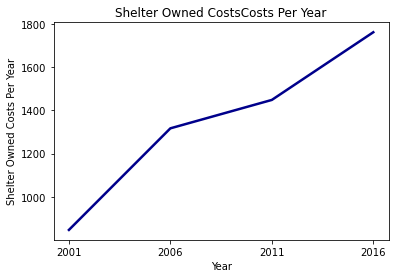

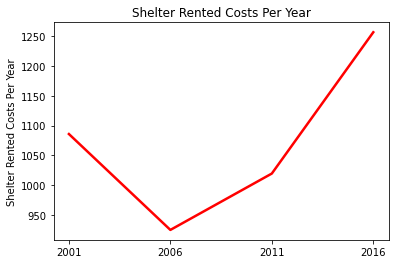

In [18]:
# Create two line charts, one to plot the monthly shelter costs for owned dwelleing and other for rented dwellings per year

average_shelter_costs_owned_all_plot = [846.8785714285714, 1316.8, 1448.2142857142858, 1761.3142857142857]
average_shelter_costs_rented_all_plot = [1085.9357142857143, 925.4142857142857, 1019.7928571428571, 1256.3214285714287]

# Line chart for owned dwellings
# YOUR CODE HERE!
plt.plot(year, average_shelter_costs_owned_all_plot, color='darkblue', linewidth=2.5)
plt.title('Shelter Owned CostsCosts Per Year')
plt.xlabel('Year')
plt.ylabel('Shelter Owned Costs Per Year')
plt.show()   
# Line chart for rented dwellings
# YOUR CODE HERE!
plt.plot(year, average_shelter_costs_rented_all_plot, color='red', linewidth=2.5)
plt.title('Shelter Rented Costs Per Year')
plt.ylabel('Shelter Rented Costs Per Year')
plt.show() 

## Average House Value per Year

In this section, you want to determine the average house value per year. An investor may want to understand better the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property. You will visualize the `average_house_value` per year as a bar chart.

In [19]:
# Calculate the average house value per year
# YOUR CODE HERE!
to_data.tail()

neighbourhood  single_detached_house  \
year                                                   
2016                 Wychwood                    920   
2016           Yonge-Eglinton                   1400   
2016           Yonge-St.Clair                    520   
2016  York University Heights                   1235   
2016       Yorkdale-Glen Park                   2165   

      apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
year                                                                       
2016                         1295                 0                  880   
2016                         1995                 0                  465   
2016                         4315                 0                  450   
2016                         5505                 0                 1360   
2016                         1185                 0                   80   

      row_house  duplex  apartment_five_storeys_less  other_house  \
year                                                                
2016        290     395                         2080           35   
2016         60     310                         1445            0   
2016        220     130                         1370            0   
2016        775     280                          995            0   
2016        600     465                          830            5   

      average_house_value  shelter_costs_owned  shelter_costs_rented  
year                                                                  
2016               787760                 1864                  1146  
2016              1127052                 2398                  1535  
2016              1131888                 2192                  1619  
2016               425769                 1444                  1122  
2016               599698                 1451                  1128

In [49]:
average_house_value_2001 = to_data.loc['2001', 'average_house_value'].mean()
average_house_value_2006 = to_data.loc['2006', 'average_house_value'].mean()
average_house_value_2011 = to_data.loc['2011', 'average_house_value'].mean()
average_house_value_2016 = to_data.loc['2016', 'average_house_value'].mean()

print(f"The Average House Value in the Year 2001 is:")
print(f"${average_house_value_2001}")
print(f"The Average House Value in the Year 2006 is:")
print(f"${average_house_value_2006}")
print(f"The Average House Value in the Year 2011 is:")
print(f"${average_house_value_2011}")
print(f"The Average House Value in the Year 2016 is:")
print(f"${average_house_value_2016}")

The Average House Value in the Year 2001 is:
$289882.8857142857
The Average House Value in the Year 2006 is:
$424059.6642857143
The Average House Value in the Year 2011 is:
$530424.7214285714
The Average House Value in the Year 2016 is:
$664068.3285714285


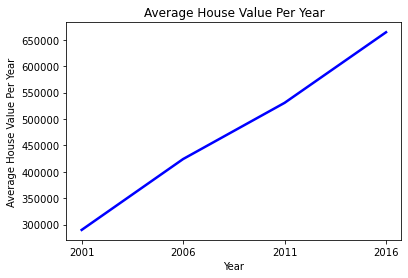

In [21]:
# Plot the average house value per year as a line chart
# YOUR CODE HERE!

average_house_value_all_plot = [289882.8857142857, 424059.6642857143, 530424.7214285714, 664068.3285714285]

plt.plot(year, average_house_value_all_plot, color='blue', linewidth=2.5)
plt.title('Average House Value Per Year')
plt.xlabel('Year')
plt.ylabel('Average House Value Per Year')
plt.show()   

- - - 

## Average House Value by Neighbourhood

In this section, you will use `hvplot` to create an interactive visualization of the average house value with a dropdown selector for the neighbourhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean house values for each year and neighbourhood.

In [22]:
# Create a new DataFrame with the mean house values by neighbourhood per year
# YOUR CODE HERE!

df_mean = to_data[
    ['neighbourhood', 'average_house_value']
]
df_mean

neighbourhood  average_house_value
year                                                   
2001               Agincourt North               200388
2001  Agincourt South-Malvern West               203047
2001                     Alderwood               259998
2001                         Annex               453850
2001             Banbury-Don Mills               371864
...                            ...                  ...
2016                      Wychwood               787760
2016                Yonge-Eglinton              1127052
2016                Yonge-St.Clair              1131888
2016       York University Heights               425769
2016            Yorkdale-Glen Park               599698

[560 rows x 2 columns]

In [23]:
# Use hvplot to create an interactive line chart of the average house value per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
# YOUR CODE HERE!

df_mean.hvplot(x='year', y='average_house_value', width=800, height=500, color='chartreuse', 
               line_width= 5, groupby='neighbourhood',
               widget_location='top_left', yformatter='%.0f'
              ,xlabel='Year',ylabel='Average House Value Price')


Column
    [0] Row
        [0] WidgetBox
            [0] Select(margin=(20, 20, 20, 20), name='neighbourhood', options=['Agincourt North', ...], value='Agincourt North', width=250)
        [1] HSpacer()
    [1] HoloViews(DynamicMap, widget_location='top_left')

## Number of Dwelling Types per Year

In this section, you will use `hvplot` to create an interactive visualization of the average number of dwelling types per year with a dropdown selector for the neighbourhood.

In [24]:
# Fetch the data of all dwelling types per year
# YOUR CODE HERE!
to_data_reset = to_data.reset_index()
to_data_reset.head()

year                 neighbourhood  single_detached_house  \
0  2001               Agincourt North                   3715   
1  2001  Agincourt South-Malvern West                   3250   
2  2001                     Alderwood                   3175   
3  2001                         Annex                   1060   
4  2001             Banbury-Don Mills                   3615   

   apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
0                         1480                 0                 1055   
1                         1835                 0                  545   
2                          315                 0                  470   
3                         6090                 5                 1980   
4                         4465                 0                  240   

   row_house  duplex  apartment_five_storeys_less  other_house  \
0       1295     195                          185            5   
1        455     105                          425            0   
2         50     185                          370            0   
3        605     275                         3710          165   
4        380      15                         1360            0   

   average_house_value  shelter_costs_owned  shelter_costs_rented  
0               200388                  810                   870  
1               203047                  806                   892  
2               259998                  817                   924  
3               453850                 1027                  1378  
4               371864                 1007                  1163

In [25]:
# Use hvplot to create an interactive bar chart of the number of dwelling types per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
# YOUR CODE HERE!

In [26]:
to_data_reset_plot = to_data_reset.groupby(['year', 'neighbourhood']).mean()
to_data_reset_plot.head()

single_detached_house  \
year neighbourhood                                         
2001 Agincourt North                              3715.0   
     Agincourt South-Malvern West                 3250.0   
     Alderwood                                    3175.0   
     Annex                                        1060.0   
     Banbury-Don Mills                            3615.0   

                                   apartment_five_storeys_plus  \
year neighbourhood                                               
2001 Agincourt North                                    1480.0   
     Agincourt South-Malvern West                       1835.0   
     Alderwood                                           315.0   
     Annex                                              6090.0   
     Banbury-Don Mills                                  4465.0   

                                   movable_dwelling  semi_detached_house  \
year neighbourhood                                                         
2001 Agincourt North                            0.0               1055.0   
     Agincourt South-Malvern West               0.0                545.0   
     Alderwood                                  0.0                470.0   
     Annex                                      5.0               1980.0   
     Banbury-Don Mills                          0.0                240.0   

                                   row_house  duplex  \
year neighbourhood                                     
2001 Agincourt North                  1295.0   195.0   
     Agincourt South-Malvern West      455.0   105.0   
     Alderwood                          50.0   185.0   
     Annex                             605.0   275.0   
     Banbury-Don Mills                 380.0    15.0   

                                   apartment_five_storeys_less  other_house  \
year neighbourhood                                                            
2001 Agincourt North                                     185.0          5.0   
     Agincourt South-Malvern West                        425.0          0.0   
     Alderwood                                           370.0          0.0   
     Annex                                              3710.0        165.0   
     Banbury-Don Mills                                  1360.0          0.0   

                                   average_house_value  shelter_costs_owned  \
year neighbourhood                                                            
2001 Agincourt North                          200388.0                810.0   
     Agincourt South-Malvern West             203047.0                806.0   
     Alderwood                                259998.0                817.0   
     Annex                                    453850.0               1027.0   
     Banbury-Don Mills                        371864.0               1007.0   

                                   shelter_costs_rented  
year neighbourhood                                       
2001 Agincourt North                              870.0  
     Agincourt South-Malvern West                 892.0  
     Alderwood                                    924.0  
     Annex                                       1378.0  
     Banbury-Don Mills                           1163.0

In [27]:
to_data_reset_plot.hvplot.bar(x='year', y=['single_detached_house','apartment_five_storeys_plus','movable_dwelling',
                                      'semi_detached_house', 'row_house', 'duplex', 'apartment_five_storeys_less',
                                      'other_house'],stacked=False, width=900,height=600, rot=90,groupby='neighbourhood', widget_location='top_left'
                                 , yformatter='%.0f"', xlabel= 'Year', ylabel = 'Dwelling Type Units', colormap='rainbow')

Column
    [0] Row
        [0] WidgetBox
            [0] Select(margin=(20, 20, 20, 20), name='neighbourhood', options=['Agincourt North', ...], value='Agincourt North', width=250)
        [1] HSpacer()
    [1] HoloViews(DynamicMap, widget_location='top_left')

- - - 

## The Top 10 Most Expensive Neighbourhoods

In this section, you will need to calculate the house value for each neighbourhood and then sort the values to obtain the top 10 most expensive neighbourhoods on average. Plot the results as a bar chart.

In [28]:
# Getting the data from the top 10 expensive neighbourhoods
# YOUR CODE HERE!

to_data

neighbourhood  single_detached_house  \
year                                                        
2001               Agincourt North                   3715   
2001  Agincourt South-Malvern West                   3250   
2001                     Alderwood                   3175   
2001                         Annex                   1060   
2001             Banbury-Don Mills                   3615   
...                            ...                    ...   
2016                      Wychwood                    920   
2016                Yonge-Eglinton                   1400   
2016                Yonge-St.Clair                    520   
2016       York University Heights                   1235   
2016            Yorkdale-Glen Park                   2165   

      apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
year                                                                       
2001                         1480                 0                 1055   
2001                         1835                 0                  545   
2001                          315                 0                  470   
2001                         6090                 5                 1980   
2001                         4465                 0                  240   
...                           ...               ...                  ...   
2016                         1295                 0                  880   
2016                         1995                 0                  465   
2016                         4315                 0                  450   
2016                         5505                 0                 1360   
2016                         1185                 0                   80   

      row_house  duplex  apartment_five_storeys_less  other_house  \
year                                                                
2001       1295     195                          185            5   
2001        455     105                          425            0   
2001         50     185                          370            0   
2001        605     275                         3710          165   
2001        380      15                         1360            0   
...         ...     ...                          ...          ...   
2016        290     395                         2080           35   
2016         60     310                         1445            0   
2016        220     130                         1370            0   
2016        775     280                          995            0   
2016        600     465                          830            5   

      average_house_value  shelter_costs_owned  shelter_costs_rented  
year                                                                  
2001               200388                  810                   870  
2001               203047                  806                   892  
2001               259998                  817                   924  
2001               453850                 1027                  1378  
2001               371864                 1007                  1163  
...                   ...                  ...                   ...  
2016               787760                 1864                  1146  
2016              1127052                 2398                  1535  
2016              1131888                 2192                  1619  
2016               425769                 1444                  1122  
2016               599698                 1451                  1128  

[560 rows x 12 columns]

In [29]:
# Plotting the data from the top 10 expensive neighbourhoods
# YOUR CODE HERE

richest_neighbourhoods = to_data.groupby('neighbourhood').mean()
richest_neighbourhoods_sorted = richest_neighbourhoods.sort_values('average_house_value', ascending=False)
richest_neighbourhoods_sorted_top_10 = richest_neighbourhoods_sorted[0:10]
richest_neighbourhoods_sorted_top_10_housevalue = richest_neighbourhoods_sorted_top_10['average_house_value']
richest_neighbourhoods_sorted_top_10_housevalue.hvplot.bar(yformatter="%.0f", width=750,height=600, rot=90, 
                                                           title='Top 10 Most Expensive Neighbourhoods In Toronto',
                                                           ylabel='Price',
                                                          xlabel='Price')

:Bars   [neighbourhood]   (average_house_value)

## Neighbourhood Map

In this section, you will read in neighbourhoods location data and build an interactive map with the average house value per neighbourhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [30]:
# Load neighbourhoods coordinates data
file_path = Path("Data/toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path,index_col='neighbourhood')
df_neighbourhood_locations.head()


lat        lon
neighbourhood                                     
Agincourt North               43.805441 -79.266712
Agincourt South-Malvern West  43.788658 -79.265612
Alderwood                     43.604937 -79.541611
Annex                         43.671585 -79.404001
Banbury-Don Mills             43.737657 -79.349718

### Data Preparation

You will need to join the location data with the mean values per neighbourhood.

1. Calculate the mean values for each neighbourhood.

2. Join the average values with the neighbourhood locations.

In [31]:
# Calculate the mean values for each neighborhood
# YOUR CODE HERE!

""" Dataframe mean already calucated above in cell [22] so resued here"""

richest_neighbourhoods

single_detached_house  \
neighbourhood                                         
Agincourt North                             3435.00   
Agincourt South-Malvern West                2897.50   
Alderwood                                   2903.75   
Annex                                        751.25   
Banbury-Don Mills                           3572.50   
...                                             ...   
Wychwood                                    1056.25   
Yonge-Eglinton                              1468.75   
Yonge-St.Clair                               565.00   
York University Heights                     1355.00   
Yorkdale-Glen Park                          2286.25   

                              apartment_five_storeys_plus  movable_dwelling  \
neighbourhood                                                                 
Agincourt North                                   1947.50              2.50   
Agincourt South-Malvern West                      2180.00              1.25   
Alderwood                                          302.50              1.25   
Annex                                             7235.00              1.25   
Banbury-Don Mills                                 5388.75              1.25   
...                                                   ...               ...   
Wychwood                                          1236.25              0.00   
Yonge-Eglinton                                    1638.75              0.00   
Yonge-St.Clair                                    3948.75              0.00   
York University Heights                           5165.00              1.25   
Yorkdale-Glen Park                                1347.50              0.00   

                              semi_detached_house  row_house  duplex  \
neighbourhood                                                          
Agincourt North                            863.75    1406.25  512.50   
Agincourt South-Malvern West               375.00     456.25  523.75   
Alderwood                                  503.75      76.25  302.50   
Annex                                     1375.00     613.75  355.00   
Banbury-Don Mills                          273.75     626.25   32.50   
...                                           ...        ...     ...   
Wychwood                                   992.50     298.75  325.00   
Yonge-Eglinton                             470.00      33.75  328.75   
Yonge-St.Clair                             425.00     212.50  172.50   
York University Heights                   1316.25     662.50  188.75   
Yorkdale-Glen Park                          73.75     450.00  377.50   

                              apartment_five_storeys_less  other_house  \
neighbourhood                                                            
Agincourt North                                    547.50        10.00   
Agincourt South-Malvern West                       628.75        32.50   
Alderwood                                          502.50         1.25   
Annex                                             4605.00        83.75   
Banbury-Don Mills                                 1340.00         0.00   
...                                                   ...          ...   
Wychwood                                          1878.75        17.50   
Yonge-Eglinton                                    1385.00         6.25   
Yonge-St.Clair                                    1308.75         6.25   
York University Heights                           1085.00        33.75   
Yorkdale-Glen Park                                 722.50         7.50   

                              average_house_value  shelter_costs_owned  \
neighbourhood                                                            
Agincourt North                         329811.50              1109.00   
Agincourt South-Malvern West            334189.00              1131.25   
Alderwood                               427922.50              1166.75   
Annex           

In [32]:
# Join the average values with the neighbourhood locations
# YOUR CODE HERE!

df_mean_neighbourhood_locations = pd.concat([richest_neighbourhoods, df_neighbourhood_locations], axis=1)
df_mean_neighbourhood_locations

single_detached_house  \
neighbourhood                                         
Agincourt North                             3435.00   
Agincourt South-Malvern West                2897.50   
Alderwood                                   2903.75   
Annex                                        751.25   
Banbury-Don Mills                           3572.50   
...                                             ...   
Wychwood                                    1056.25   
Yonge-Eglinton                              1468.75   
Yonge-St.Clair                               565.00   
York University Heights                     1355.00   
Yorkdale-Glen Park                          2286.25   

                              apartment_five_storeys_plus  movable_dwelling  \
neighbourhood                                                                 
Agincourt North                                   1947.50              2.50   
Agincourt South-Malvern West                      2180.00              1.25   
Alderwood                                          302.50              1.25   
Annex                                             7235.00              1.25   
Banbury-Don Mills                                 5388.75              1.25   
...                                                   ...               ...   
Wychwood                                          1236.25              0.00   
Yonge-Eglinton                                    1638.75              0.00   
Yonge-St.Clair                                    3948.75              0.00   
York University Heights                           5165.00              1.25   
Yorkdale-Glen Park                                1347.50              0.00   

                              semi_detached_house  row_house  duplex  \
neighbourhood                                                          
Agincourt North                            863.75    1406.25  512.50   
Agincourt South-Malvern West               375.00     456.25  523.75   
Alderwood                                  503.75      76.25  302.50   
Annex                                     1375.00     613.75  355.00   
Banbury-Don Mills                          273.75     626.25   32.50   
...                                           ...        ...     ...   
Wychwood                                   992.50     298.75  325.00   
Yonge-Eglinton                             470.00      33.75  328.75   
Yonge-St.Clair                             425.00     212.50  172.50   
York University Heights                   1316.25     662.50  188.75   
Yorkdale-Glen Park                          73.75     450.00  377.50   

                              apartment_five_storeys_less  other_house  \
neighbourhood                                                            
Agincourt North                                    547.50        10.00   
Agincourt South-Malvern West                       628.75        32.50   
Alderwood                                          502.50         1.25   
Annex                                             4605.00        83.75   
Banbury-Don Mills                                 1340.00         0.00   
...                                                   ...          ...   
Wychwood                                          1878.75        17.50   
Yonge-Eglinton                                    1385.00         6.25   
Yonge-St.Clair                                    1308.75         6.25   
York University Heights                           1085.00        33.75   
Yorkdale-Glen Park                                 722.50         7.50   

                              average_house_value  shelter_costs_owned  \
neighbourhood                                                            
Agincourt North                         329811.50              1109.00   
Agincourt South-Malvern West            334189.00              1131.25   
Alderwood                               427922.50              1166.75   
Annex           

### Mapbox Visualization

Plot the average values per neighbourhood using a Plotly express `scatter_mapbox` visualization.

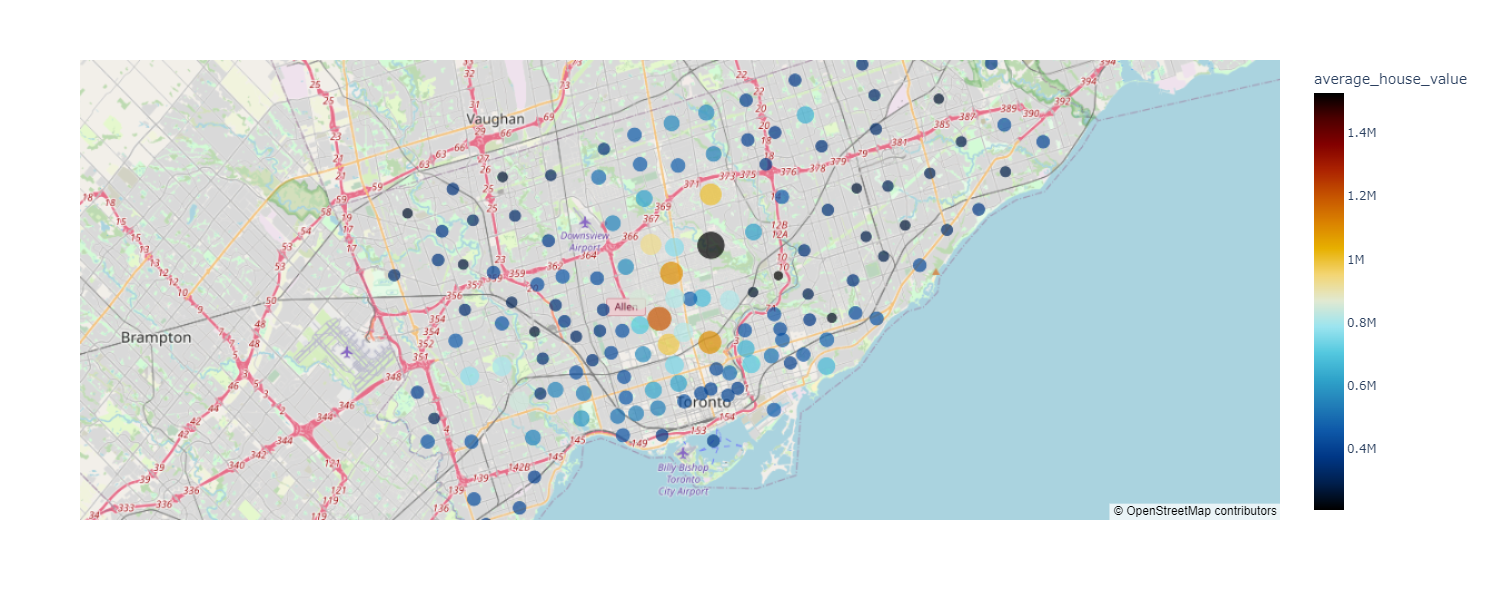

In [33]:
# Create a scatter mapbox to analyze neighbourhood info
# YOUR CODE HERE!

fig = px.scatter_mapbox(df_mean_neighbourhood_locations, lat="lat", lon="lon",   color="average_house_value",
                  color_continuous_scale=px.colors.cyclical.IceFire, size='average_house_value', zoom=10,mapbox_style='open-street-map', height=600)
fig.show()

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to a couple of plots that investors can interactively filter and explore various factors related to the house value of the Toronto's neighbourhoods. 

### Create a bar chart row facet to plot the average house values for all Toronto's neighbourhoods per year

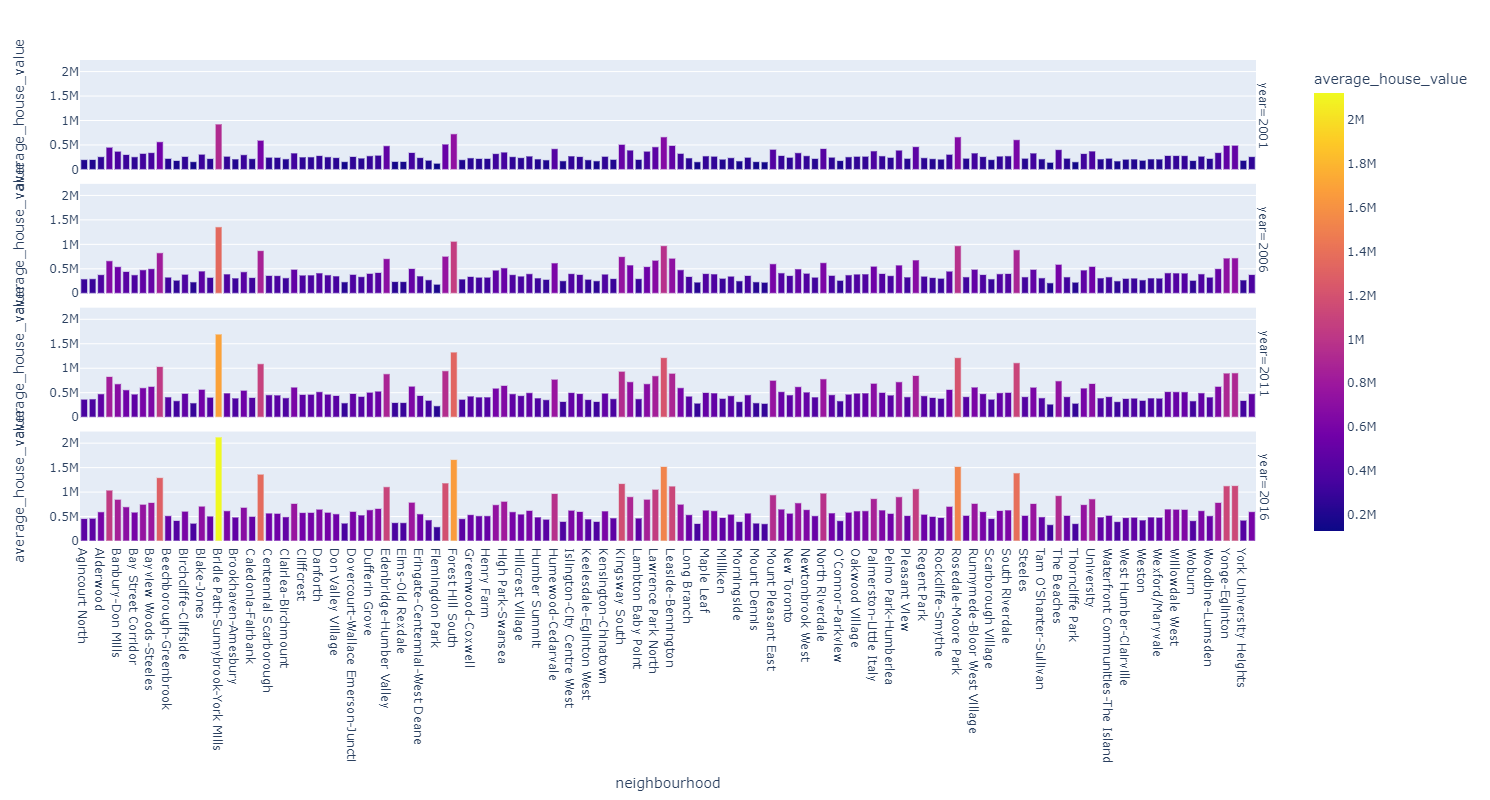

In [34]:
# YOUR CODE HERE!
avg_house_value_year = to_data[
    ['neighbourhood','average_house_value']
].reset_index()

fig = px.bar(avg_house_value_year, x='neighbourhood', y='average_house_value', color='average_house_value', facet_row='year', height=800)
fig.show()


### Create a sunburst chart to conduct a costs analysis of most expensive neighbourhoods in Toronto per year

In [35]:
# Fetch the data from all expensive neighbourhoods per year.
# YOUR CODE HERE!
df_mean_reset = to_data.reset_index()
df_mean_reset

year                 neighbourhood  single_detached_house  \
0    2001               Agincourt North                   3715   
1    2001  Agincourt South-Malvern West                   3250   
2    2001                     Alderwood                   3175   
3    2001                         Annex                   1060   
4    2001             Banbury-Don Mills                   3615   
..    ...                           ...                    ...   
555  2016                      Wychwood                    920   
556  2016                Yonge-Eglinton                   1400   
557  2016                Yonge-St.Clair                    520   
558  2016       York University Heights                   1235   
559  2016            Yorkdale-Glen Park                   2165   

     apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
0                           1480                 0                 1055   
1                           1835                 0                  545   
2                            315                 0                  470   
3                           6090                 5                 1980   
4                           4465                 0                  240   
..                           ...               ...                  ...   
555                         1295                 0                  880   
556                         1995                 0                  465   
557                         4315                 0                  450   
558                         5505                 0                 1360   
559                         1185                 0                   80   

     row_house  duplex  apartment_five_storeys_less  other_house  \
0         1295     195                          185            5   
1          455     105                          425            0   
2           50     185                          370            0   
3          605     275                         3710          165   
4          380      15                         1360            0   
..         ...     ...                          ...          ...   
555        290     395                         2080           35   
556         60     310                         1445            0   
557        220     130                         1370            0   
558        775     280                          995            0   
559        600     465                          830            5   

     average_house_value  shelter_costs_owned  shelter_costs_rented  
0                 200388                  810                   870  
1                 203047                  806                   892  
2                 259998                  817                   924  
3                 453850                 1027                  1378  
4                 371864                 1007                  1163  
..                   ...                  ...                   ...  
555               787760                 1864                  1146  
556              1127052                 2398                  1535  
557              1131888                 2192                  1619  
558               425769                 1444                  1122  
559               599698                 1451                  1128  

[560 rows x 13 columns]

In [36]:
# Create the sunburst chart
# YOUR CODE HERE!

df_mean_reset_2001 = df_mean_reset.loc[df_mean_reset['year'] == 2001].sort_values('average_house_value', ascending=False)[0:10]
df_mean_reset_2006 = df_mean_reset.loc[df_mean_reset['year'] == 2006].sort_values('average_house_value', ascending=False)[0:10]
df_mean_reset_2011 = df_mean_reset.loc[df_mean_reset['year'] == 2011].sort_values('average_house_value', ascending=False)[0:10]
df_mean_reset_2016 = df_mean_reset.loc[df_mean_reset['year'] == 2016].sort_values('average_house_value', ascending=False)[0:10]

top10_richest_neighbourhoods_byyear = pd.concat([df_mean_reset_2001, df_mean_reset_2006, df_mean_reset_2011,df_mean_reset_2016])
top10_richest_neighbourhoods_byyear.head()

year                      neighbourhood  single_detached_house  \
16   2001  Bridle Path-Sunnybrook-York Mills                   2275   
44   2001                  Forest Hill South                   1815   
69   2001                Lawrence Park South                   3590   
104  2001                Rosedale-Moore Park                   2610   
111  2001               St.Andrew-Windfields                   3275   

     apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
16                           110                 0                   25   
44                          2440                 5                   65   
69                           570                 0                  170   
104                         3880                 0                  520   
111                         1455                 0                  220   

     row_house  duplex  apartment_five_storeys_less  other_house  \
16          15      10                           20            0   
44          45      85                         1010           15   
69          70     190                          845           40   
104        225     290                         1735            0   
111        555      45                          525            5   

     average_house_value  shelter_costs_owned  shelter_costs_rented  
16                927466                 1983                  1790  
44                726664                 1001                  1469  
69                664712                 1021                  1630  
104               664476                 1219                  1540  
111               607040                 1055                  1551

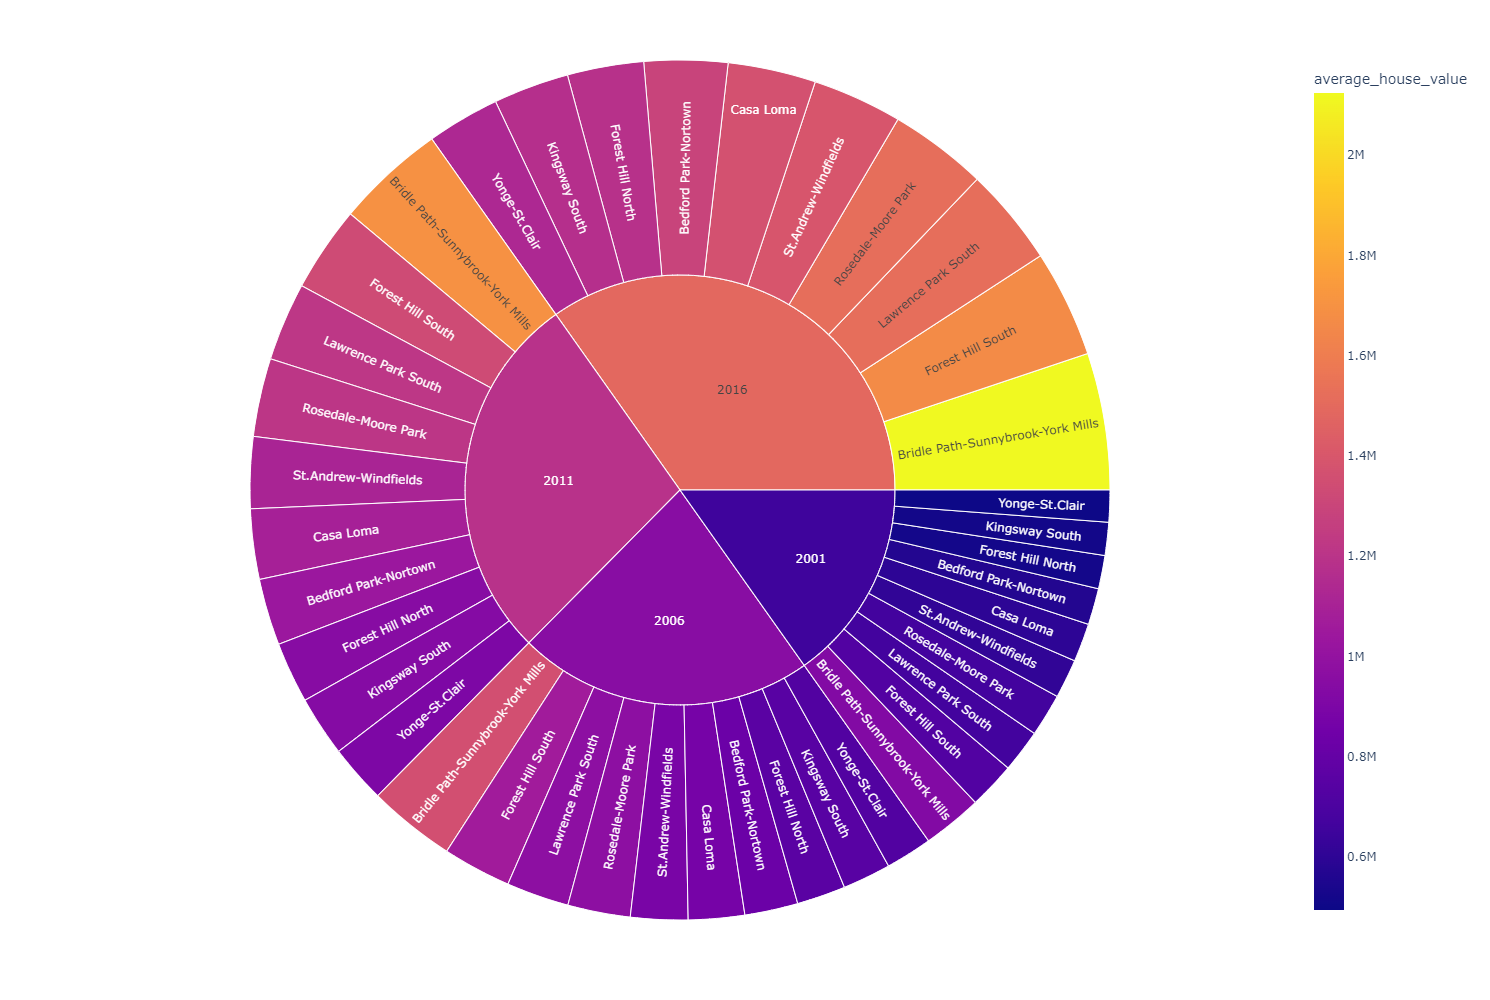

In [37]:
sunburst_chart = px.sunburst(top10_richest_neighbourhoods_byyear, path=['year','neighbourhood'], values='average_house_value', 
                             color='average_house_value',
                             hover_data=['single_detached_house','apartment_five_storeys_plus','movable_dwelling','semi_detached_house', 'row_house', 'duplex', 'apartment_five_storeys_less',
                                         'other_house', 'shelter_costs_owned','shelter_costs_rented'],
                             width=1000,height=1000)
sunburst_chart.show()